# 데이터 상관관계 분석

# 상관분석과 상관계수
- 상관분석: 어떤 요소들의 관계가 어떤 관계를 가지고 있는지 성향을 분석하는 것
- 상관분석 결과를 산포도, 산점도 그래프로 그리면 직관적으로 두 변수간의 관계 파악 가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc, font_manager
import matplotlib
# 한글 처리를 위해 폰트 설정
fontname="C:/Windows/Fonts/gulim.ttc"
font_name=font_manager.FontProperties(fname=fontname).get_name()
matplotlib.rc('font',family=font_name)

# 그림 크기
plt.rcParams['figure.figsize']=(4,3)
# 마이너스 기호(-) 처리
plt.rcParams['axes.unicode_minus']=False

# 산포도 그래프 작성(키와 발크기)

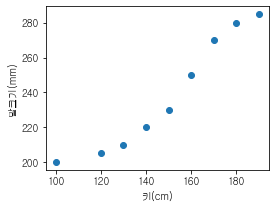

In [2]:
height=[100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]
plt.scatter(height,foot_size)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

# 산포도 그래프 작성(산의 높이에 따른 기온 변화)

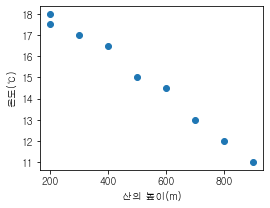

In [3]:
h=[200,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]
plt.scatter(h,t)
plt.xlabel('산의 높이(m)')
plt.ylabel('온도(℃)')
plt.show()

# 산포도 그래프 작성(상관관계가 없는 데이터)

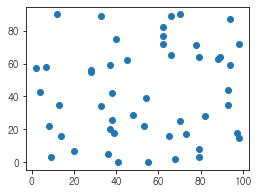

In [4]:
# randint(start,end,size(생성될 임의의 정수 갯수))
random_x=np.random.randint(0,100,50) 
random_y=np.random.randint(0,100,50)
plt.scatter(random_x,random_y)
plt.show()

0.966126323516351


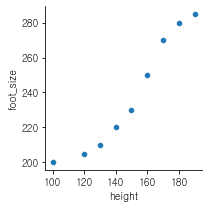

In [5]:
# seaborn으로 산포도 그래프 작성(relplot으로 그래프 생성할 때 dataFrame 작성 필요)
df=pd.DataFrame({'height':height,'foot_size':foot_size})
print(df.height.corr(df.foot_size)) # 키와 발크기 상관관계 출력
sns.relplot(x='height',y='foot_size',data=df,height=3)
plt.show()

-0.9932466837826042


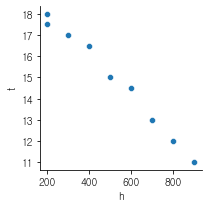

In [6]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))
sns.relplot(x='h',y='t',data=df,height=3)
plt.show()

0.10307811933664893


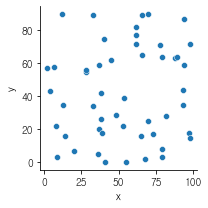

In [7]:
df=pd.DataFrame({'x':random_x,'y':random_y})
print(df.x.corr(df.y))
sns.relplot(x='x',y='y',data=df,height=3)
plt.show()

In [9]:
# tips dataset load
tips=sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


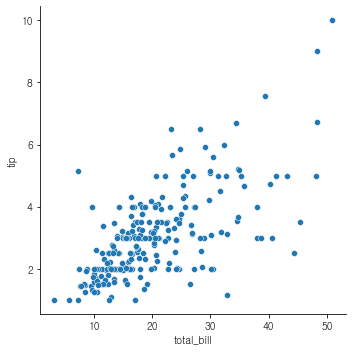

In [52]:
sns.relplot(x='total_bill',y='tip',data=tips)
#print(tips.total_bill(tips.tip))

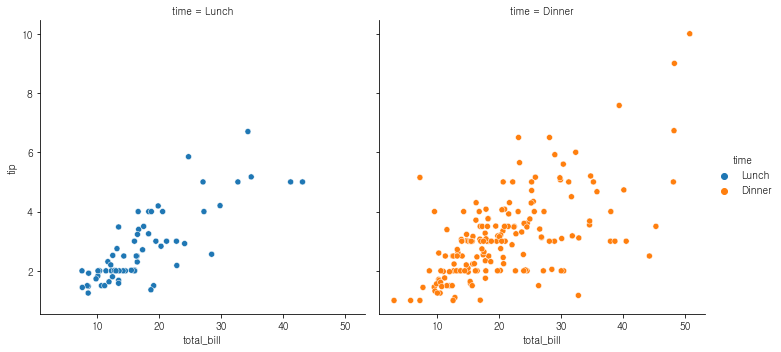

In [13]:
sns.relplot(x='total_bill',y='tip',col='time',data=tips,hue='time')

In [14]:
import math

def correlation(x,y):
    n=len(x)
    vals=range(n)
    x_sum=0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0
    
    for i in vals:
        mul_xy_sum=mul_xy_sum+float(x[i])*float(y[i])
        x_sum=x_sum+float(x[i])
        y_sum=y_sum+float(y[i])
        x_sum_pow=x_sum_pow+pow(float(x[i]),2)
        y_sum_pow=y_sum_pow+pow(float(y[i]),2)
    try:
        r=((n*mul_xy_sum)-(x_sum*y_sum))/math.sqrt(((n*x_sum_pow)-pow(x_sum,2))*((n*y_sum_pow)-pow(y_sum,2)))
    except:
        print("error")
        r=0.0
    return r

In [15]:
h=[200,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]
print(h)
print(t)
print('상관분석:',correlation(h,t))

[200, 200, 300, 400, 500, 600, 700, 800, 900]
[18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
상관분석: -0.9932466837826043


In [16]:
print(random_x)
print(random_y)
print('상관분석:',correlation(random_x,random_y))

[40 98 78 93  9 79  7 70 48 55 79 33 37 53 65  8 88 94 14 79 73 36 33 54
 20 94 89 13 62 93 45 12 70 82 62 97 66 37 62 98 38 28  2 28  4 38 66 41
 68 39]
[75 72 71 35  3  3 58 90 29  0  8 89 20 22 16 22 63 87 16 64 17  5 34 39
  7 59 64 35 72 44 62 90 25 28 77 18 65 59 82 15 26 55 57 56 43 42 89  0
  2 18]
상관분석: 0.10307811933664886


# Pandas 사용 상관관계분석

In [17]:
df1=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))

AttributeError: 'DataFrame' object has no attribute 'h'

In [18]:
df2=pd.DataFrame({'x':random_x,'y':random_y})
print(df.x.corr(df.y))

0.10307811933664893


In [19]:
height=[100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]
list=[height,foot_size]
df3=pd.DataFrame(list).T
print(df3)
corr=df3.corr(method='pearson')
print(corr)

     0    1
0  100  200
1  120  205
2  130  210
3  140  220
4  150  230
5  160  250
6  170  270
7  180  280
8  190  285
          0         1
0  1.000000  0.966126
1  0.966126  1.000000


In [20]:
height=[100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]
weight=[25,30,35,40,45,55,68,70]
list=[height,foot_size,weight]
df4=pd.DataFrame(list).T
print(df4)
corr=df4.corr(method='pearson')
print(corr)

       0      1     2
0  100.0  200.0  25.0
1  120.0  205.0  30.0
2  130.0  210.0  35.0
3  140.0  220.0  40.0
4  150.0  230.0  45.0
5  160.0  250.0  55.0
6  170.0  270.0  68.0
7  180.0  280.0  70.0
8  190.0  285.0   NaN
          0         1         2
0  1.000000  0.966126  0.969839
1  0.966126  1.000000  0.995207
2  0.969839  0.995207  1.000000


# 상관관계 시각화 Heatmap

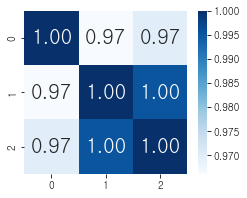

In [49]:
df_heatmap=sns.heatmap(corr, #상관계수 값
                      cbar=True, #사이드바 표시
                      annot=True, #실제값 화면에 표시 여부
                      annot_kws={'size':20}, #글자 크기
                      fmt='.2f', #소수점 자리수 지침
                      square=True, #정사각형으로 표시여부
                      cmap='Blues') #색상지정, Reds Greens Blues

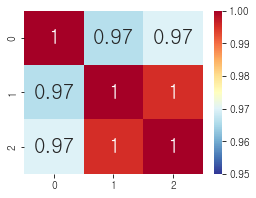

In [50]:
df_heatmap=sns.heatmap(corr, #상관계수 값
                      cbar=True, #사이드바 표시
                      annot=True, #실제값 화면에 표시 여부
                      annot_kws={'size':20}, #글자 크기
                      cmap='RdYlBu_r', #색상지정, Reds Greens Blues
                      vmin=0.95, vmax=1) #색상 표시 최대값과 최소값

In [30]:
tips_corr=tips.corr(method='pearson')
print(tips_corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


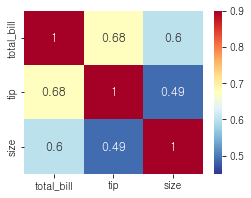

In [40]:
df_heatmap=sns.heatmap(tips_corr, #상관계수 값
                      cbar=True, #사이드바 표시
                      annot=True, #실제값 화면에 표시 여부
                      annot_kws={'size':12}, #글자 크기
                      cmap='RdYlBu_r', #색상지정, Red, yellow, blue 색상으로 표시
                      vmin=0.45, vmax=0.9) #색상 표시 최대값과 최소값

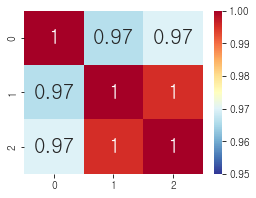

In [42]:
df_heatmap=sns.heatmap(corr, #상관계수 값
                      cbar=True, #사이드바 표시
                      annot=True, #실제값 화면에 표시 여부
                      annot_kws={'size':20}, #글자 크기
                      cmap='RdYlBu_r', #색상지정, Reds Greens Blues
                      vmin=0.95, vmax=1) #색상 표시 최대값과 최소값

C:\Users\USER\AppData\Local\Temp\ipykernel_788\2722808169.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool) #삼각형 마스크 만들기 위해 corr 전체 False


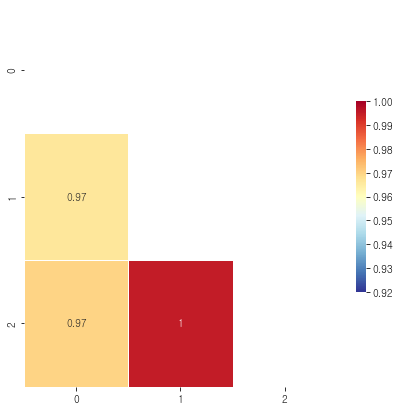

In [56]:
import numpy as np
fig, ax=plt.subplots(figsize=(7,7))

# 1. 위쪽 지우기
mask=np.zeros_like(corr, dtype=np.bool) #삼각형 마스크 만들기 위해 corr 전체 False
mask[np.triu_indices_from(mask)]=True #위쪽 삼각형에 True

# 2. 아래쪽 지우기
#mask=np.ones_like(corr, dtype=np.bool) #삼각형 마스크 만들기 위해 corr 전체 False
#mask[np.triu_indices_from(mask)]=False #아래쪽 삼각형에 True

df_heatmap=sns.heatmap(
    corr, #상관계수 값
    cbar_kws={'shrink':.5}, #컬러바 크기 절반으로 줄이기
    annot=True,
    mask=mask, #표시하지 않는 마스크 부분 지정
    linewidth=.5, #경계면 시선으로 구분하기
    cmap='RdYlBu_r', #색상지정, Red, yellow, blue 색상으로 표시
    vmin=0.92,vmax=1)